<a href="https://colab.research.google.com/github/2xazo/classification/blob/main/twitter_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import nltk # clean
from nltk.tokenize import word_tokenize
from nltk import download
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_excel('twitter-sa.xlsx')

In [ ]:
data.head()

,Label,Review
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61692 entries, 0 to 61691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   61692 non-null  object
 1   Review  61121 non-null  object
dtypes: object(2)
memory usage: 964.1+ KB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates()

,Label,Review
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
61687,Positive,Just realized that the Windows partition of my...
61688,Positive,Just realized that my Mac window partition is ...
61689,Positive,Just realized the windows partition of my Mac ...
61690,Positive,Just realized between the windows partition of...


In [ ]:
print("Original DataFrame columns:", data.columns)


Original DataFrame columns: Index(['Label', 'Review'], dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61121 entries, 0 to 61691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   61121 non-null  object
 1   Review  61121 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [ ]:
nltk.download('punkt_tab') # Downloading the missing punkt_tab data
nltk.download('punkt')  # For tokenization using word_tokenize
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # For WordNet lemmatizer data
nltk.download('stopwords')  # For stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove punctuation !@#$%
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming instead of lemmatization   viribles
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a single string
    return ' '.join(stemmed_tokens)

# Assuming 'data' is your DataFrame and 'review_body' is the column you want to clean
data['Review-c'] = data['Review'].apply(preprocess_text)

In [ ]:
data['Label'].head(10)

,Label
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
5,Positive
6,Positive
7,Positive
8,Positive
9,Positive


In [ ]:
X = data['Review']
y = data['Label']

In [ ]:
X

,Review
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
61687,Just realized that the Windows partition of my...
61688,Just realized that my Mac window partition is ...
61689,Just realized the windows partition of my Mac ...
61690,Just realized between the windows partition of...


In [ ]:
y

,Label
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
61687,Positive
61688,Positive
61689,Positive
61690,Positive


In [ ]:
lapel_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
data['Label'] = data['Label'].map(lapel_mapping)

In [ ]:
x=data['Review'].to_numpy()
y=data['Label'].to_numpy()

In [ ]:
y

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
X=data['Review-c'].astype(str)
vectorizer = TfidfVectorizer()
X_v = vectorizer.fit_transform(X)

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X_v, y, test_size=0.2)


In [ ]:
print("Vectorized x_train shape:", X_train.shape)
print("Vectorized x_test shape:", x_test.shape)

Vectorized x_train shape: (48896, 27481)
Vectorized x_test shape: (12225, 27481)


In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_nb1 = nb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_nb1)
print("Accuracy:", accuracy)

Accuracy: 0.8138293520942408


In [ ]:
y_pred_nb = nb_model.predict(x_test) #####
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.7644171779141105


<ipython-input-169-c32a397e2e3c>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Negative',"nutural", 'Positive'])
<ipython-input-169-c32a397e2e3c>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Negative',"nutural" ,'Positive'])


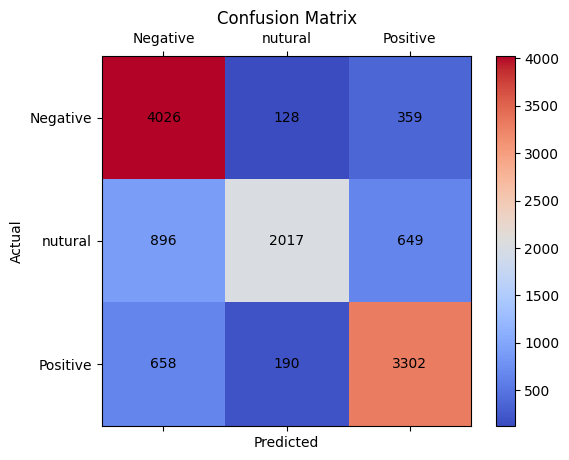

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding color bar
fig.colorbar(cax)

# Add annotations of the confusion matrix numbers
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Set tick marks for grid
ax.set_xticklabels([''] + ['Negative',"nutural", 'Positive'])
ax.set_yticklabels([''] + ['Negative',"nutural" ,'Positive'])

plt.show()